In [1]:
from keras.applications import VGG19
import tensorflow as tf
from tensorflow.keras.callbacks import TensorBoard 
import time 
 
vgg_conv = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(224, 224, 3))

Using TensorFlow backend.


In [2]:
# Freeze the layers except the last 4 layers
for layer in vgg_conv.layers[:-4]:
    layer.trainable = False
 
# Check the trainable status of the individual layers
for layer in vgg_conv.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x0000025918BADB00> False
<keras.layers.convolutional.Conv2D object at 0x000002592A3F3E48> False
<keras.layers.convolutional.Conv2D object at 0x000002592A3F3CC0> False
<keras.layers.pooling.MaxPooling2D object at 0x000002592A415240> False
<keras.layers.convolutional.Conv2D object at 0x000002592A415F98> False
<keras.layers.convolutional.Conv2D object at 0x000002592A4527B8> False
<keras.layers.pooling.MaxPooling2D object at 0x000002592A469390> False
<keras.layers.convolutional.Conv2D object at 0x000002592A469C50> False
<keras.layers.convolutional.Conv2D object at 0x000002592A499470> False
<keras.layers.convolutional.Conv2D object at 0x000002592A4B57F0> False
<keras.layers.convolutional.Conv2D object at 0x000002592A4D1390> False
<keras.layers.pooling.MaxPooling2D object at 0x000002592A4E87F0> False
<keras.layers.convolutional.Conv2D object at 0x000002592A4FF470> False
<keras.layers.convolutional.Conv2D object at 0x000002592A51C860> False
<ker

In [3]:
import keras
import numpy as np
from random import shuffle
train_dir = 'C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/train'
validation_dir = 'C:/Users/Muhammad Zubair Khan/Downloads/Compressed/ddb1_fundusimages/validation'
 
nTrain = 160
nValidation = 40

datagen = keras.preprocessing.image.ImageDataGenerator(rescale=1./255)
batch_size = 10
 
train_features = np.zeros(shape=(nTrain, 7, 7, 512))
train_labels = np.zeros(shape=(nTrain,3))

validation_features = np.zeros(shape=(nValidation, 7, 7, 512))
validation_labels = np.zeros(shape=(nValidation,3))


 
train_generator = datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=shuffle)

validation_generator = datagen.flow_from_directory(
    validation_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=shuffle)

Found 160 images belonging to 3 classes.
Found 40 images belonging to 3 classes.


In [4]:
from keras import models
from keras import layers
from keras import optimizers
 
# Create the model
model = models.Sequential()
 
# Add the vgg convolutional base model
model.add(vgg_conv)
 
# Add new layers
model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(3, activation='softmax'))
 
# Show a summary of the model. Check the number of trainable parameters
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 7, 7, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 25088)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              25691136  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 3)                 3075      
Total params: 45,718,595
Trainable params: 32,773,635
Non-trainable params: 12,944,960
_________________________________________________________________


In [5]:
# Compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [6]:
# Train the model
history = model.fit_generator(
      train_generator,
      steps_per_epoch=train_generator.samples/train_generator.batch_size ,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=validation_generator.samples/validation_generator.batch_size,
      verbose=1)

Epoch 1/30
16/16 [==============================] - 177s 11s/step - loss: 1.6497 - acc: 0.4563 - val_loss: 0.8047 - val_acc: 0.6000
Epoch 2/30
16/16 [==============================] - 147s 9s/step - loss: 0.7734 - acc: 0.6813 - val_loss: 0.6398 - val_acc: 0.7750
Epoch 3/30
16/16 [==============================] - 147s 9s/step - loss: 0.6218 - acc: 0.7750 - val_loss: 1.1053 - val_acc: 0.6750
Epoch 4/30
16/16 [==============================] - 146s 9s/step - loss: 0.5287 - acc: 0.7812 - val_loss: 0.7467 - val_acc: 0.8000
Epoch 5/30
16/16 [==============================] - 147s 9s/step - loss: 0.5089 - acc: 0.8125 - val_loss: 0.8384 - val_acc: 0.6000
Epoch 6/30
16/16 [==============================] - 147s 9s/step - loss: 0.3519 - acc: 0.8875 - val_loss: 0.7581 - val_acc: 0.7000
Epoch 7/30
16/16 [==============================] - 147s 9s/step - loss: 0.3254 - acc: 0.8750 - val_loss: 0.7006 - val_acc: 0.7250
Epoch 8/30
16/16 [==============================] - 146s 9s/step - loss: 0.3205 - 

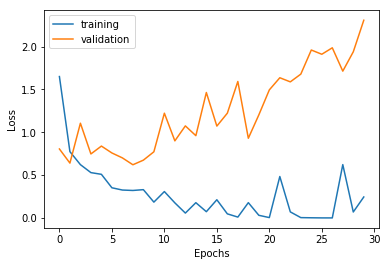

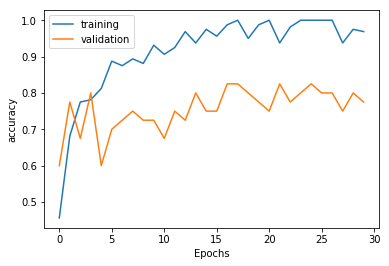

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
def plot_history(value):
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("Loss")
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.legend(['training', 'validation'])
    
    plt.figure()
    plt.xlabel('Epochs')
    plt.ylabel("accuracy")
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
    plt.legend(['training', 'validation'])
    plt.show()
    
plot_history(history)